# Data visualization

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import missingno as msno
from pandas_profiling import ProfileReport

import matplotlib.pyplot as plt
from matplotlib import style  
import matplotlib.cm as cm   
%matplotlib inline

#plot colors https://python-graph-gallery.com/196-select-one-color-with-matplotlib/

from bokeh.plotting import figure, output_file, show
from bokeh.models import ColumnDataSource
from bokeh.models.tools import HoverTool
from bokeh.io import output_notebook
from bokeh.themes import built_in_themes
from bokeh.io import curdoc
from bokeh.palettes import Spectral5, Spectral3, Viridis, Plasma, Category20b 
from bokeh.transform import factor_cmap
output_notebook() 

from pywaffle import Waffle
import squarify  

from sklearn.preprocessing import MultiLabelBinarizer # Similar to One-Hot Encoding

from wordcloud import WordCloud
import nltk
from nltk.collocations import *
from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.stem import PorterStemmer 

url = 'https://raw.githubusercontent.com/Sampayob/Visualization/master/datasets/appstore_games.csv'
    
df = pd.read_csv(url)

Loading BokehJS ...

### EDA

In [2]:
df.head()

,URL,ID,Name,Subtitle,Icon URL,Average User Rating,User Rating Count,Price,In-app Purchases,Description,Developer,Age Rating,Languages,Size,Primary Genre,Genres,Original Release Date,Current Version Release Date
0,https://apps.apple.com/us/app/sudoku/id284921427,284921427,Sudoku,NaN,https://is2-ssl.mzstatic.com/image/thumb/Purpl...,4.0,3553.0,2.99,NaN,"Join over 21,000,000 of our fans and download ...",Mighty Mighty Good Games,4+,"DA, NL, EN, FI, FR, DE, IT, JA, KO, NB, PL, PT...",15853568.0,Games,"Games, Strategy, Puzzle",11/07/2008,30/05/2017
1,https://apps.apple.com/us/app/reversi/id284926400,284926400,Reversi,NaN,https://is4-ssl.mzstatic.com/image/thumb/Purpl...,3.5,284.0,1.99,NaN,"The classic game of Reversi, also known as Oth...",Kiss The Machine,4+,EN,12328960.0,Games,"Games, Strategy, Board",11/07/2008,17/05/2018
2,https://apps.apple.com/us/app/morocco/id284946595,284946595,Morocco,NaN,https://is5-ssl.mzstatic.com/image/thumb/Purpl...,3.0,8376.0,0.00,NaN,Play the classic strategy game Othello (also k...,Bayou Games,4+,EN,674816.0,Games,"Games, Board, Strategy",11/07/2008,5/09/2017
3,https://apps.apple.com/us/app/sudoku-free/id28...,285755462,Sudoku (Free),NaN,https://is3-ssl.mzstatic.com/image/thumb/Purpl...,3.5,190394.0,0.00,NaN,"Top 100 free app for over a year.\nRated ""Best...",Mighty Mighty Good Games,4+,"DA, NL, EN, FI, FR, DE, IT, JA, KO, NB, PL, PT...",21552128.0,Games,"Games, Strategy, Puzzle",23/07/2008,30/05/2017
4,https://apps.apple.com/us/app/senet-deluxe/id2...,285831220,Senet Deluxe,NaN,https://is1-ssl.mzstatic.com/image/thumb/Purpl...,3.5,28.0,2.99,NaN,"""Senet Deluxe - The Ancient Game of Life and A...",RoGame Software,4+,"DA, NL, EN, FR, DE, EL, IT, JA, KO, NO, PT, RU...",34689024.0,Games,"Games, Strategy, Board, Education",18/07/2008,22/07/2018


In [3]:
df.dtypes

URL                              object
ID                                int64
Name                             object
Subtitle                         object
Icon URL                         object
Average User Rating             float64
User Rating Count               float64
Price                           float64
In-app Purchases                 object
Description                      object
Developer                        object
Age Rating                       object
Languages                        object
Size                            float64
Primary Genre                    object
Genres                           object
Original Release Date            object
Current Version Release Date     object
dtype: object

#### Missing values

In [4]:
print (df.isnull().sum())

URL                                 0
ID                                  0
Name                                0
Subtitle                        11746
Icon URL                            0
Average User Rating              9446
User Rating Count                9446
Price                              24
In-app Purchases                 9324
Description                         0
Developer                           0
Age Rating                          0
Languages                          60
Size                                1
Primary Genre                       0
Genres                              0
Original Release Date               0
Current Version Release Date        0
dtype: int64


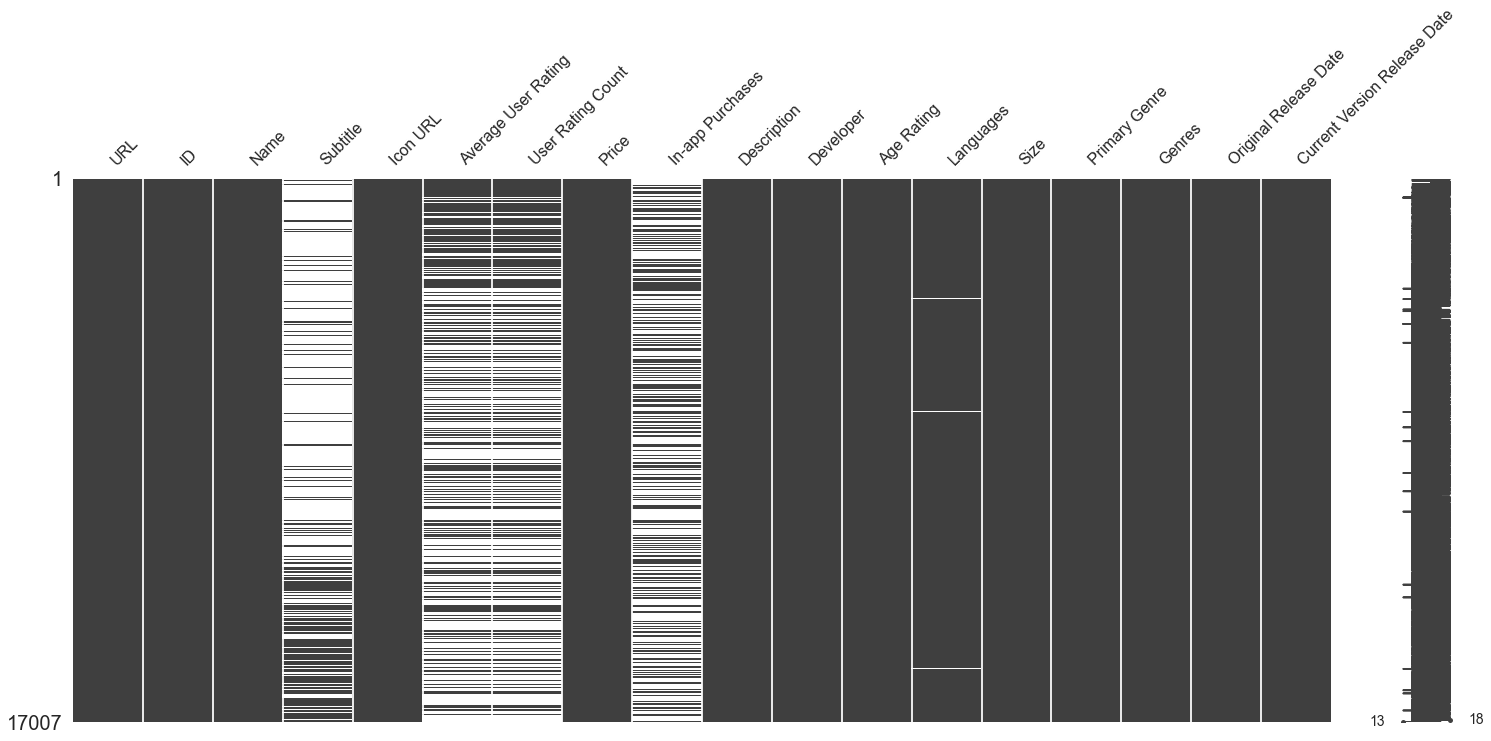

In [5]:
%matplotlib inline

msno.matrix(df)

#### Duplicate rows

In [6]:
print('Total number of rows: ' + str(df.shape[0]))
print('Number of duplicate rows: ' + str(df[df.duplicated()].shape[0]))

Total number of rows: 17007
Number of duplicate rows: 160


## Distribution plots

In [7]:
plt.style.use("ggplot") 

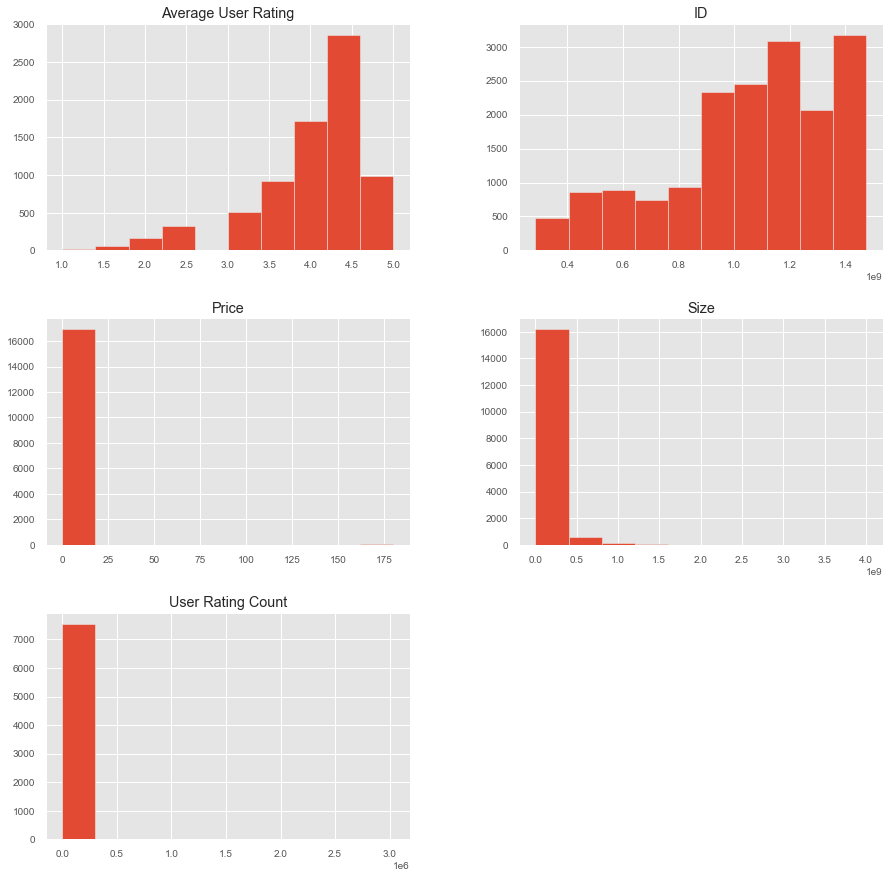

In [8]:
data_distribution = df.hist(figsize=(15,15))

### Ratings

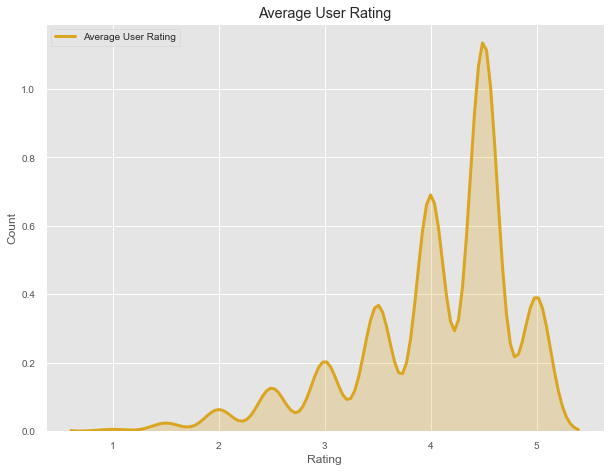

In [9]:
plt.figure(figsize=(10,7.5))

sns.kdeplot( data = df['Average User Rating'], shade = True, linewidth = 3, color = 'goldenrod')

plt.xlabel('Rating')
plt.ylabel('Count')
plt.title('Average User Rating')

plt.show()

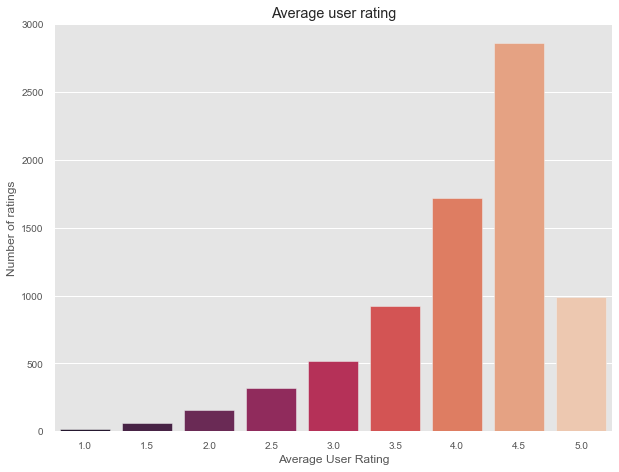

In [10]:
%matplotlib inline

plt.figure(figsize=(10,7.5))
sns.countplot(x ='Average User Rating', data =df, palette="rocket")

plt.xlabel('Average User Rating')
plt.ylabel('Number of ratings')
plt.title('Average user rating')

plt.show()

### Price

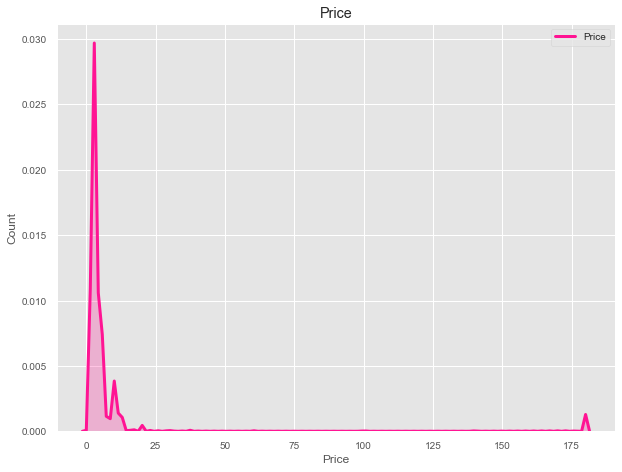

In [11]:
plt.figure(figsize=(10,7.5))

sns.kdeplot( data = df['Price'], shade = True, linewidth = 3, color = 'deeppink', bw=0.5)

plt.xlabel('Price')
plt.ylabel('Count')
plt.title('Price')

plt.show()

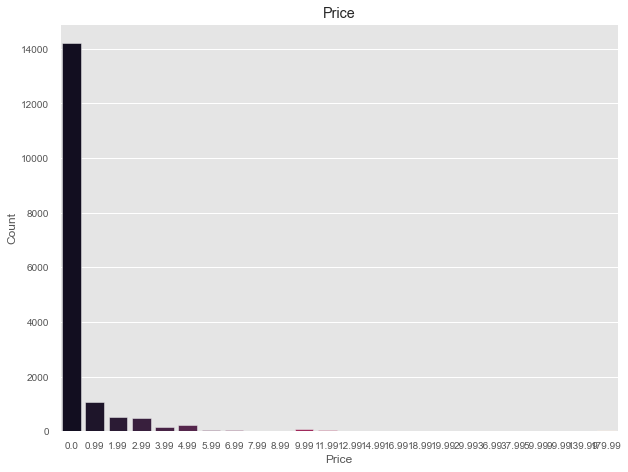

In [12]:
%matplotlib inline

plt.figure(figsize=(10,7.5))
sns.countplot(x ='Price', data =df, palette="rocket")

plt.xlabel('Price')
plt.ylabel('Count')
plt.title('Price')

plt.show()

#### Price binned

In [13]:
df['Price'].value_counts()

0.00      14212
0.99       1078
1.99        515
2.99        471
4.99        237
3.99        163
9.99         88
11.99        59
5.99         42
6.99         32
179.99       30
7.99         17
8.99         13
19.99         9
14.99         4
12.99         3
16.99         2
29.99         2
99.99         1
36.99         1
59.99         1
139.99        1
37.99         1
18.99         1
Name: Price, dtype: int64

In [14]:
bins = [0, 2, 4, 6, 8, 10, 12, 14, 16, 18, 200]
labels = ['0-2','2-4','4-6','6-8','8-10','10-12','12-14','14-16','16-18','18+']
df['binned'] = pd.cut(df['Price'], bins=bins, labels=labels)

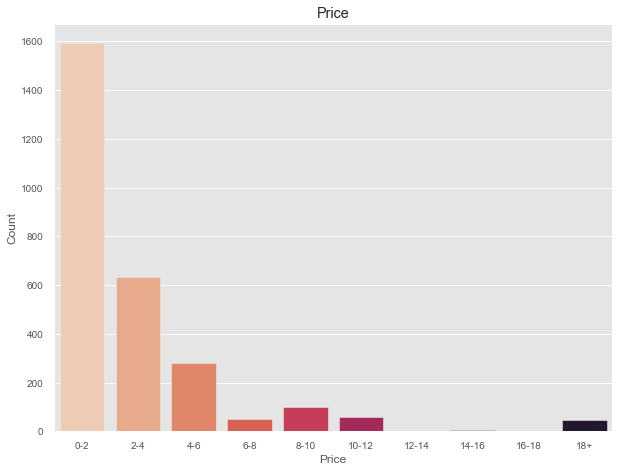

In [15]:
%matplotlib inline

plt.figure(figsize=(10,7.5))
sns.countplot(x ='binned', data =df, palette="rocket_r")

plt.xlabel('Price')
plt.ylabel('Count')
plt.title('Price')

plt.show()

### Genres

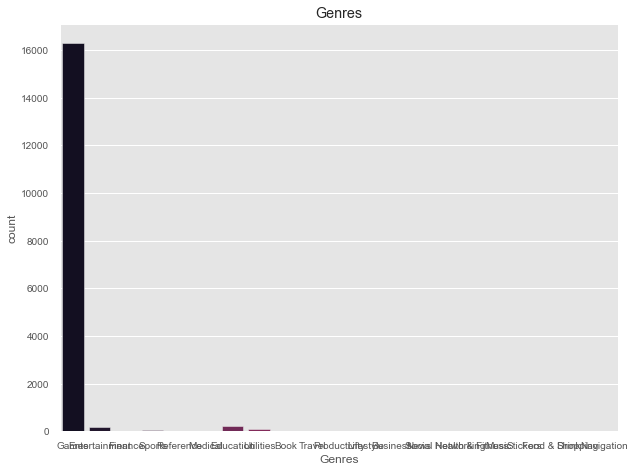

In [16]:
plt.figure(figsize=(10,7.5))
sns.countplot(x ='Primary Genre', data =df, palette="rocket")

plt.xlabel('Genres')
plt.title('Genres')

plt.show()

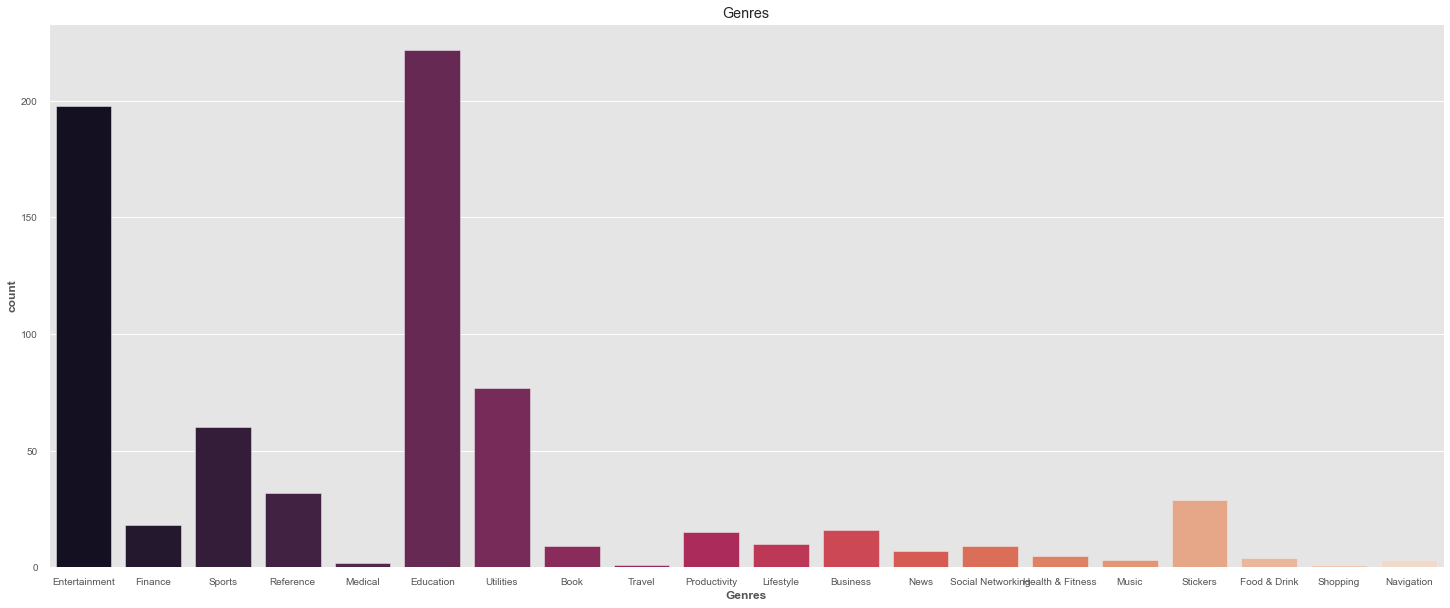

In [17]:
plt.rcParams['axes.labelweight'] = 'bold'

plt.figure(figsize=(25,10))
sns.countplot(x =df[df['Primary Genre'] != 'Games']['Primary Genre'], data =df, palette="rocket")

plt.xlabel('Genres')
plt.title('Genres')

plt.show()

In [18]:
genre = df[df['Primary Genre'] != 'Games']['Primary Genre'].value_counts()

p = figure(x_range=list(map(str, genre.index.values)), 
           plot_height=250, plot_width=1500, title="Primary Genre", 
           toolbar_location=None, 
           tools="")

p.vbar(x=list(map(str, genre.index.values)), 
       top=genre.values, 
       width=0.9, 
       color=Category20b.get(20))

p.xgrid.grid_line_color = None
p.y_range.start = 0

show(p)

findfont: Font family ['Times New Roman Bold'] not found. Falling back to DejaVu Sans.


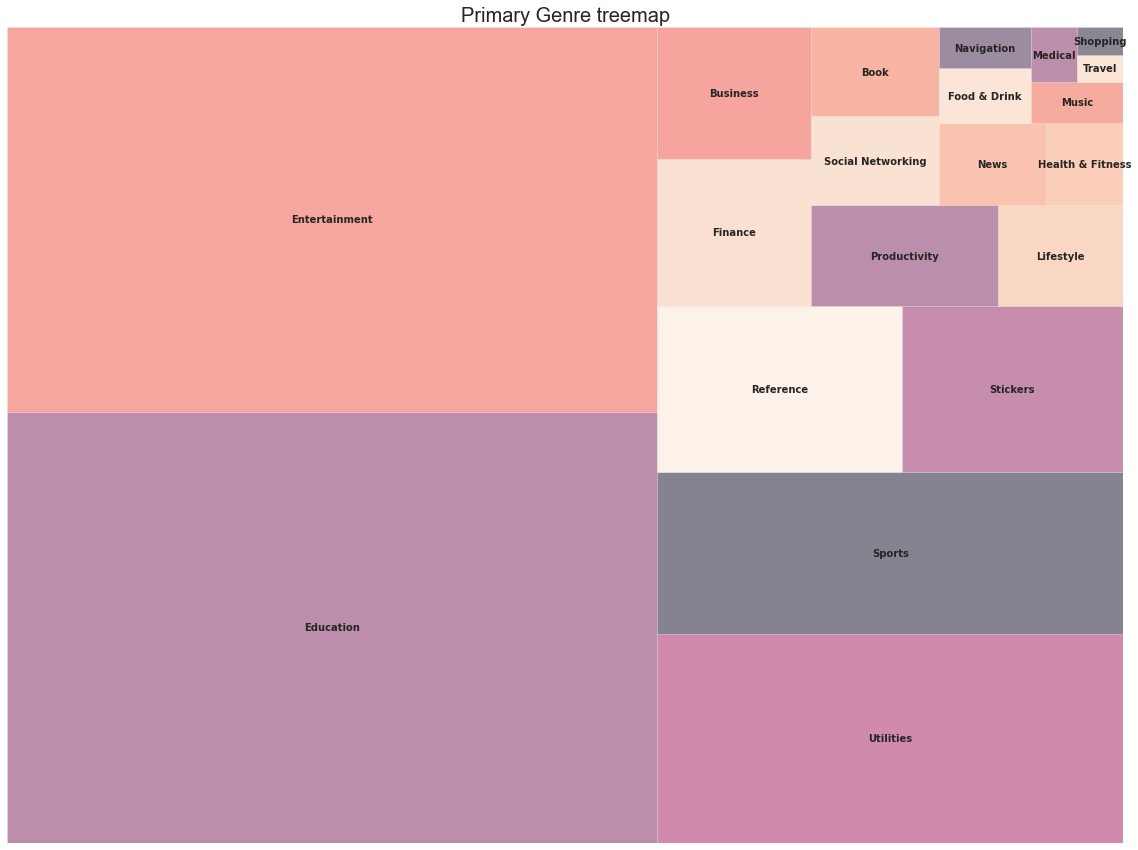

In [19]:
plt.figure(figsize=(20,15))

genre = df[df['Primary Genre'] != 'Games']['Primary Genre'].value_counts().reset_index()

squarify.plot(sizes=genre['Primary Genre'], label=genre['index'], text_kwargs={'fontsize':10, 'fontname':"Times New Roman Bold",'weight':'bold'}, alpha=.5)
plt.axis('off')
plt.title('Primary Genre treemap',  fontsize = 20)
plt.show()


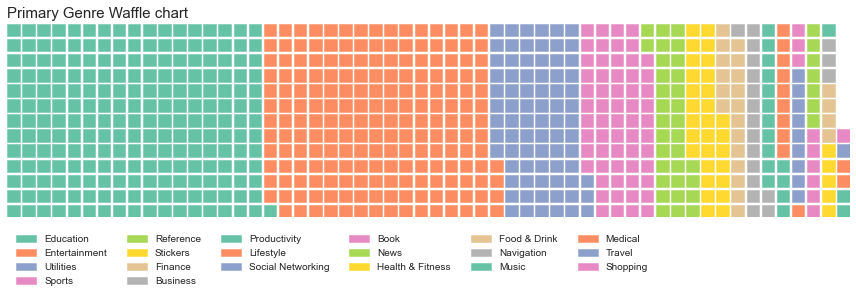

In [20]:
fig = plt.figure(
    FigureClass=Waffle,
    rows=13,
    values=genre['Primary Genre'],
    title={
        'label': 'Primary Genre Waffle chart',
        'loc': 'left',
        'fontdict': {
            'fontsize': 15
        }
    },
    font_size=20, 
    figsize=(12, 12), 
    labels=list(genre['index']),
    legend={'loc': 'lower left', 'bbox_to_anchor': (0, -0.4), 'ncol': len(genre['index'])//3,  'framealpha': 0}
)

### Game size

In [21]:
df_sizemod = df.copy()
    
df_sizemod['Size'] = (df_sizemod['Size']/1000000).round(0)

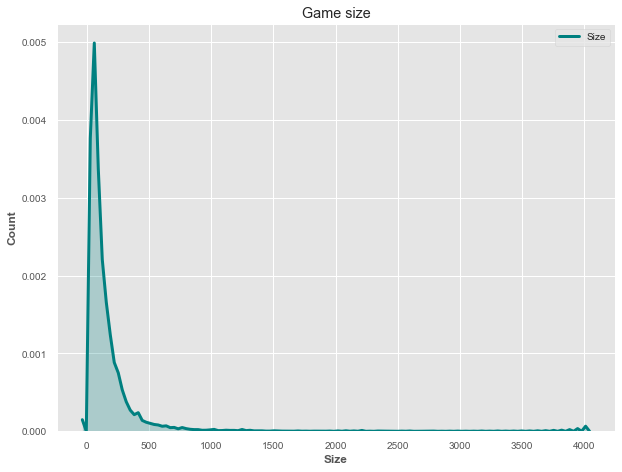

In [22]:
plt.figure(figsize=(10,7.5))

sns.kdeplot( data = df_sizemod['Size'], shade = True, linewidth = 3, color = 'teal')

plt.xlabel('Size')
plt.ylabel('Count')
plt.title('Game size')

plt.show()

In [23]:
bins = [0,250.0, 500.0, 1000.0, 1250.0, 1500.0, 2000.0]
labels = ['<250MB','250MB','500MB','1GB','1.5GB','+2GB']
df_sizemod['binned'] = pd.cut(df_sizemod['Size'], bins=bins, labels=labels)

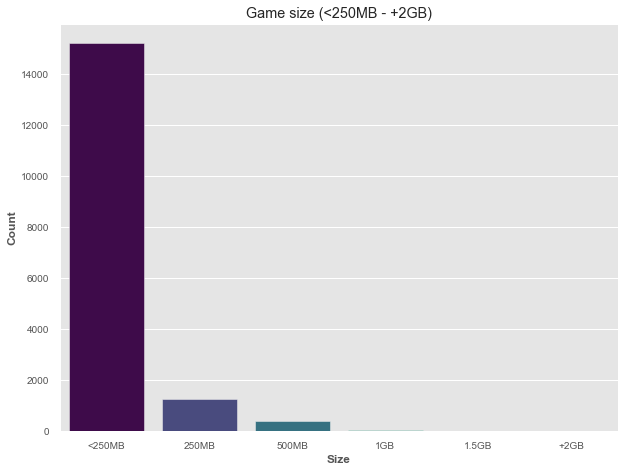

In [24]:
plt.figure(figsize=(10,7.5))

sns.countplot( data = df_sizemod, x = 'binned', palette = Viridis.get(6))

plt.xlabel('Size')
plt.ylabel('Count')
plt.title('Game size (<250MB - +2GB)')

plt.show()

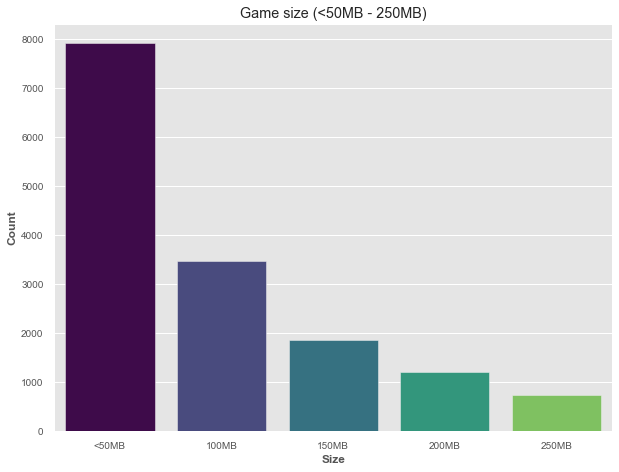

In [25]:
df_sizemod = df.copy()
df_sizemod['Size'] = (df_sizemod['Size']/1000000).round(0)
df_sizemod = df_sizemod[df_sizemod['Size'] < 250]

bins = [0,50.0, 100.0, 150.0, 200.0, 250.0]
labels = ['<50MB','100MB','150MB','200MB','250MB']
df_sizemod['binned'] = pd.cut(df_sizemod['Size'], bins=bins, labels=labels)

plt.figure(figsize=(10,7.5))

sns.countplot( data = df_sizemod, x = 'binned', palette = Viridis.get(6))

plt.xlabel('Size')
plt.ylabel('Count')
plt.title('Game size (<50MB - 250MB)')

plt.show()

### Age

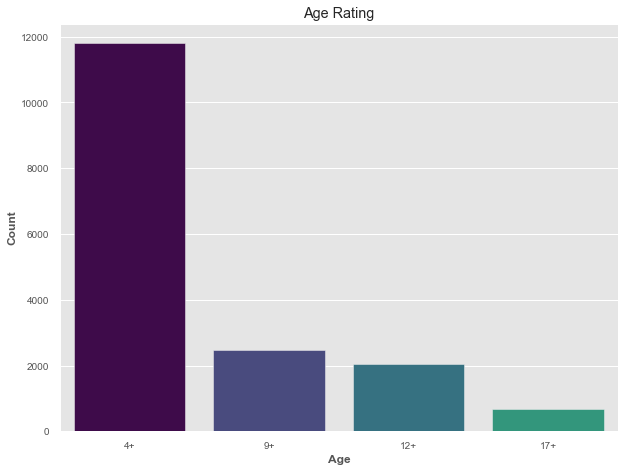

In [26]:
plt.figure(figsize=(10,7.5))

sns.countplot( data = df, x = 'Age Rating', palette = Viridis.get(6))

plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Age Rating')

plt.show()

## Pairplots

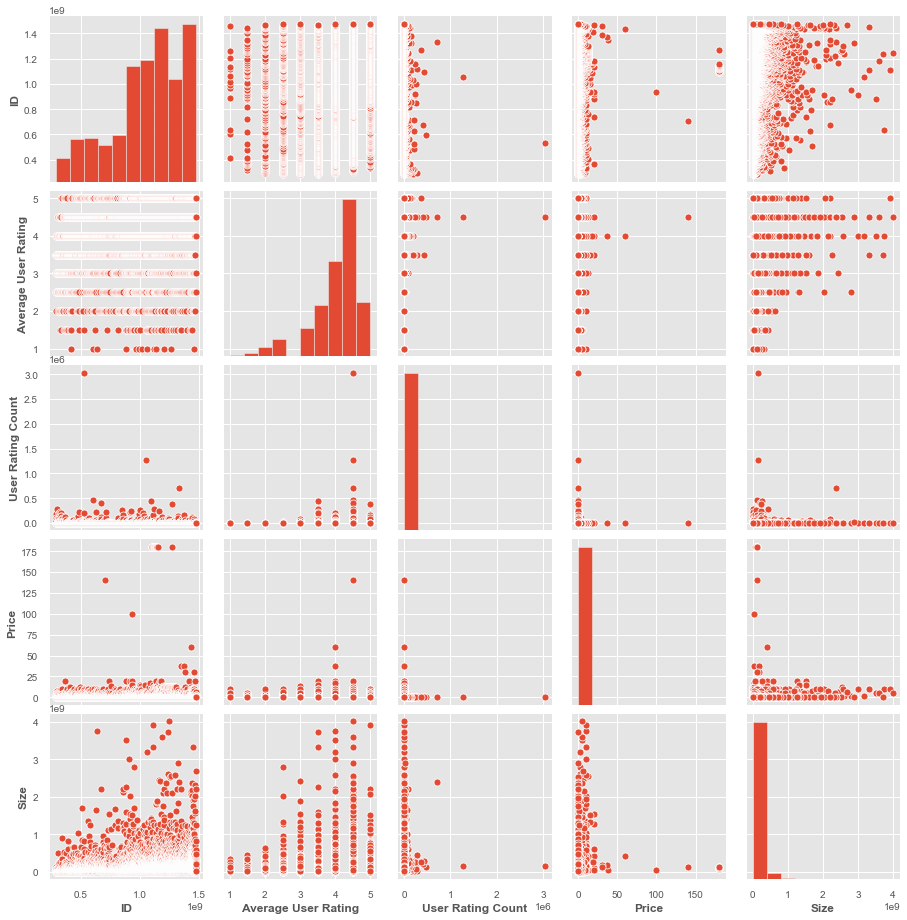

In [27]:
sns.pairplot(df)

### Average User Rating vs Primary Genre

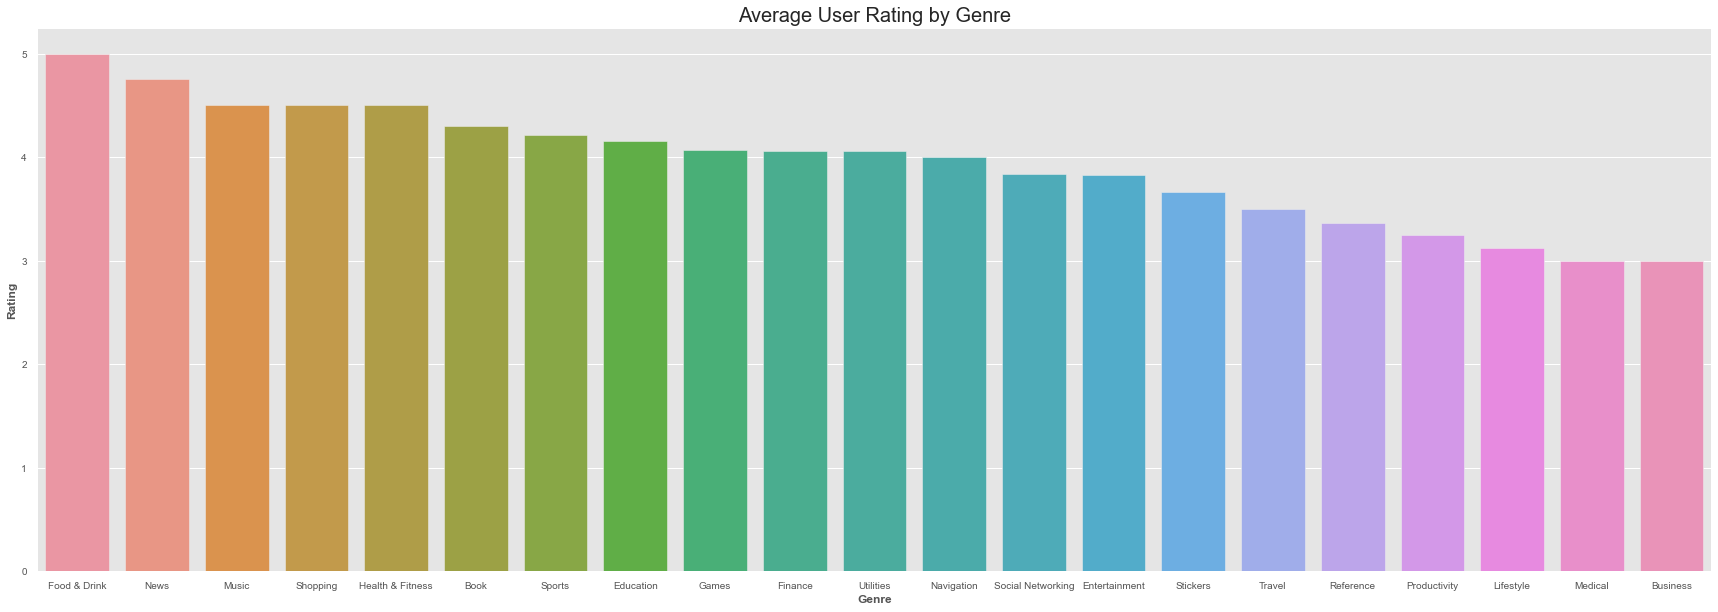

In [28]:
groupby = df.groupby(df['Primary Genre'])['Average User Rating'].mean().reset_index().sort_values('Average User Rating', ascending=False)

plt.figure(figsize=(30,10)) 

sns.barplot(x="Primary Genre", y="Average User Rating", data=groupby)

#plot configuration
plt.title('Average User Rating by Genre', fontsize = 20)
plt.xlabel('Genre')
plt.ylabel('Rating')
plt.show()

In [29]:
width = 2000
height = 350

source = ColumnDataSource(groupby)

genres = source.data['Primary Genre'].tolist() 

p = figure(x_range=genres, plot_width=width, plot_height=height)

color_map = factor_cmap(field_name='Primary Genre', 
                    palette=Category20b.get(20), factors=genres)

p.vbar(x='Primary Genre', top='Average User Rating', source=source, width=0.70, color=color_map) #barplot

p.title.text ='Average User Rating by Genre'
p.xaxis.axis_label = 'Genre'
p.yaxis.axis_label = 'Rating'

show(p)

C:\Users\Sampayo\anaconda3\lib\site-packages\bokeh\models\mappers.py:140: UserWarning: Palette length does not match number of factors. ['Business'] will be assigned to `nan_color` gray
  warnings.warn("Palette length does not match number of factors. %s will be assigned to `nan_color` %s" % (extra_factors, self.nan_color))


### Size vs time

In [30]:
df_datesize = df_sizemod[['Original Release Date','Size']]

df_datesize['Original Release Date'] = pd.to_datetime(df_datesize['Original Release Date']) 
df_datesize = df_datesize.sort_values(by=['Original Release Date'])
df_datesize.set_index('Original Release Date', inplace = True)

df_datesize1 = df_datesize.resample("D").mean()

C:\Users\Sampayo\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [31]:
source = ColumnDataSource(df_datesize1)


p = figure(x_axis_type='datetime',plot_height=250, plot_width=750)



p.line(y='Size', x='Original Release Date', source=source) 

p.title.text ='Game size through time (group by day)'
p.xaxis.axis_label = 'Date'
p.yaxis.axis_label = 'Size'

show(p)

In [32]:
df_datesize = df_sizemod[['Original Release Date','Size']]

df_datesize['Original Release Date'] = pd.to_datetime(df_datesize['Original Release Date']) 
df_datesize = df_datesize.sort_values(by=['Original Release Date'])
df_datesize.set_index('Original Release Date', inplace = True)

df_datesize2 = df_datesize.resample("M").mean()

source = ColumnDataSource(df_datesize2)


p = figure(x_axis_type='datetime',plot_height=250, plot_width=750)



p.line(y='Size', x='Original Release Date', source=source) 

p.title.text ='Game size through time (group by month)'
p.xaxis.axis_label = 'Date'
p.yaxis.axis_label = 'Size'

show(p)

C:\Users\Sampayo\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


## Correlation

### Pairplot correlation

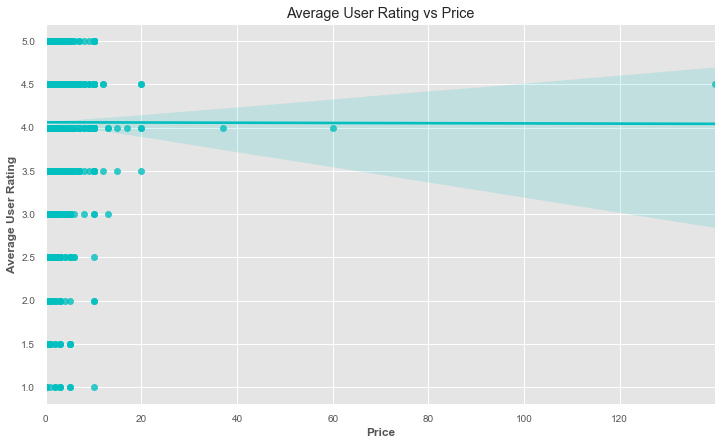

In [33]:
plt.figure(figsize=(12,7))
sns.regplot(data=df, x='Price', y='Average User Rating', color = 'c')

plt.title('Average User Rating vs Price')
plt.show()

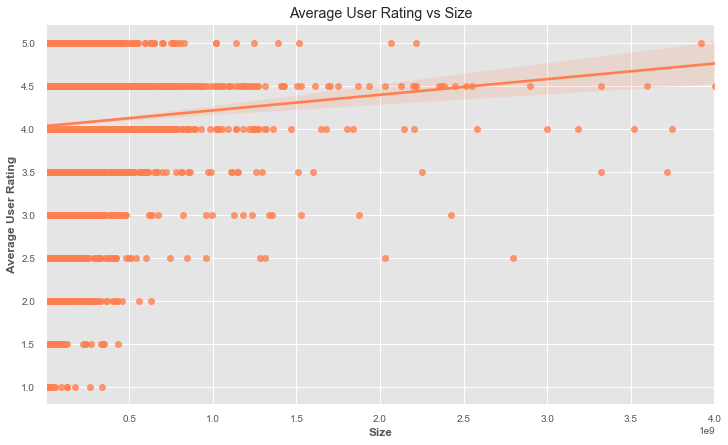

In [34]:
plt.figure(figsize=(12,7))
sns.regplot(data=df, x='Size', y='Average User Rating', color = 'coral')

plt.title('Average User Rating vs Size')
plt.show()

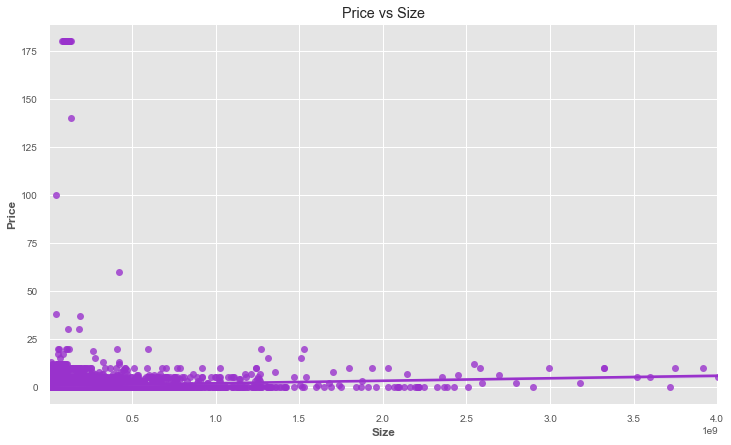

In [35]:
plt.figure(figsize=(12,7))
sns.regplot(data=df, x='Size', y='Price', color = 'darkorchid')

plt.title('Price vs Size')
plt.show()

### Heatmap

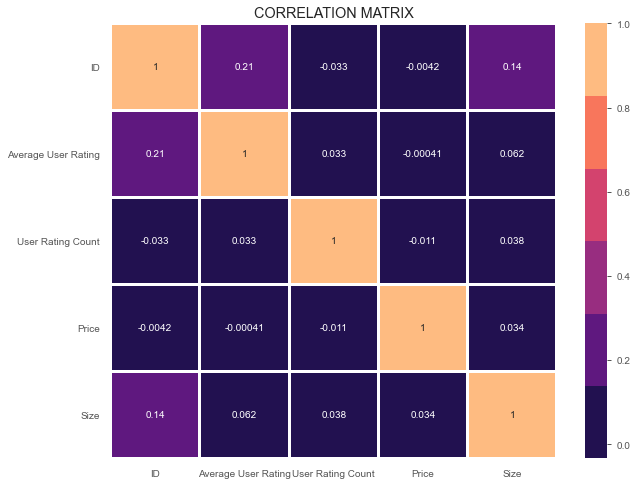

In [36]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),annot=True,cmap=sns.color_palette("magma"),linewidth=2,edgecolor="k")

plt.title("CORRELATION MATRIX")
plt.show()

### Genres correlation heatmap

In [37]:
df_corr = df.copy()
df_corr['GenreList'] = df_corr['Genres'].apply(lambda s : s.replace('Games','').replace('&',' ').replace(',', ' ').split()) 
df_corr['GenreList'].head()

0              [Strategy, Puzzle]
1               [Strategy, Board]
2               [Board, Strategy]
3              [Strategy, Puzzle]
4    [Strategy, Board, Education]
Name: GenreList, dtype: object

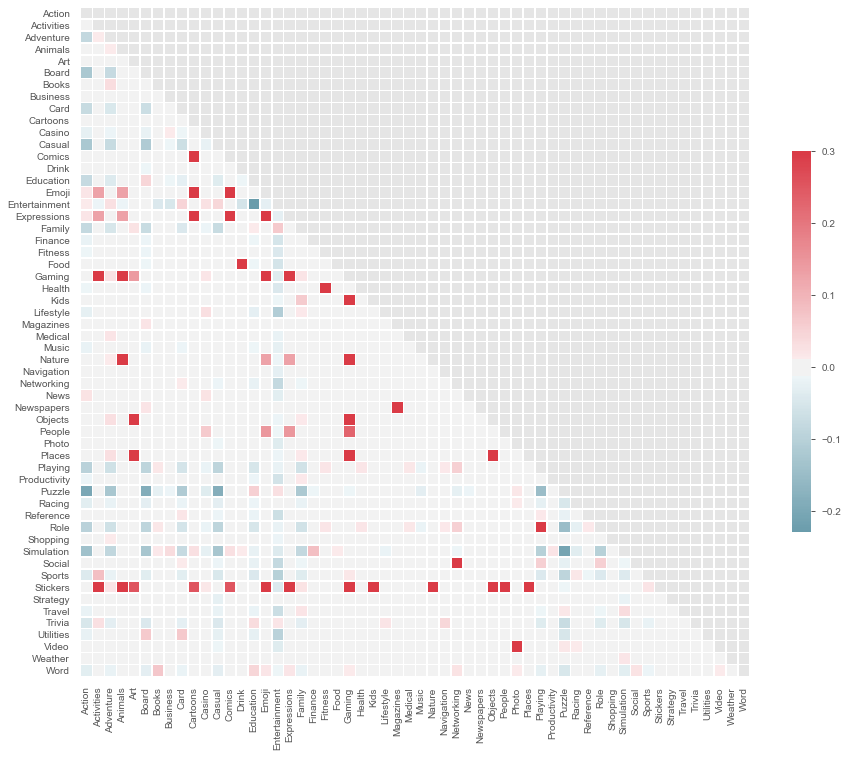

In [38]:
mlb = MultiLabelBinarizer()
res = pd.DataFrame(mlb.fit_transform(df_corr['GenreList']), columns=mlb.classes_, index=df_corr['GenreList'].index)

corr = res.corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(15, 14))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,square=True, linewidths=.5, cbar_kws={"shrink": .5})

## NLP

### Worldcloud

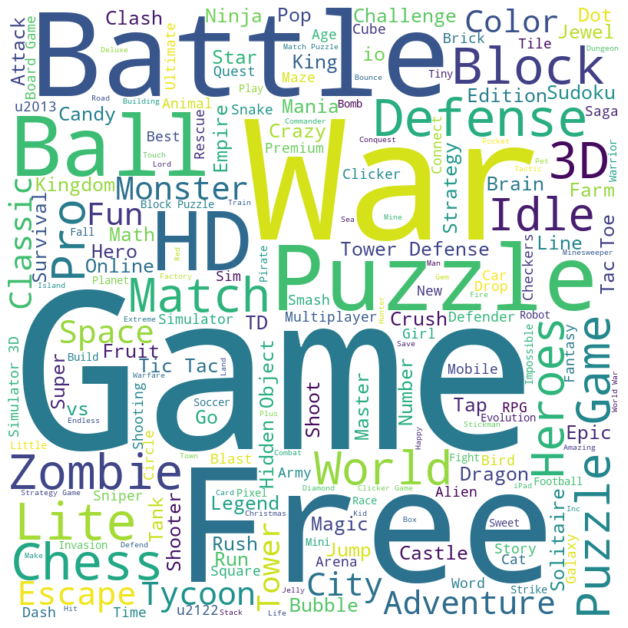

Wall time: 2.61 s


In [39]:
%%time

wordcloud = WordCloud(background_color='white',width=800, height=800).generate(' '.join(df['Name']))

fig = plt.figure()
fig.set_figwidth(11) # set width
fig.set_figheight(16) # set height

plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.show()

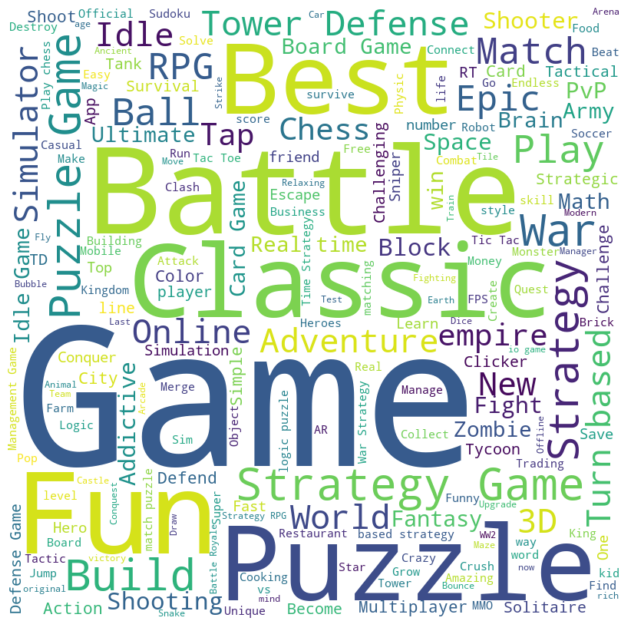

Wall time: 2.46 s


In [40]:
%%time

wordcloud_sub = WordCloud(background_color='white',width=800, height=800).generate(' '.join(df['Subtitle'].dropna().astype(str)) )

fig = plt.figure()
fig.set_figwidth(11) # set width
fig.set_figheight(16) # set height

plt.imshow(wordcloud_sub, interpolation = 'bilinear')
plt.axis('off')
plt.show()

### Descriptions insights

#### Tokenize descriptions

In [41]:
descriptions = []
for i in df['Description']:
    descriptions.append(i)
descriptions[0:1]

['Join over 21,000,000 of our fans and download one of our Sudoku games today!\\n\\nMakers of the Best Sudoku Game of 2008, Sudoku (Free), we offer you the best selling Sudoku game for iPhone with great features and 1000 unique puzzles! \\n\\nSudoku will give you many hours of fun and puzzle solving. Enjoy the challenge of solving Sudoku puzzles whenever or wherever you are using your iPhone or iPod Touch. \\n\\nOPTIONS\\n\\nAll options are on by default, but you can turn them off in the Options menu\\n\\u2022 Show Incorrect :: Shows incorrect answers in red.  \\n\\u2022 Smart Buttons :: Disables the number button when that number is completed on the game board.   \\n\\u2022 Smart Notes :: Removes the number from the notes in the box, column, and row that contains the cell with your correct answer.\\n\\nFEATURES\\n\\n\\u2022 1000 unique handcrafted puzzles\\n\\u2022 ALL puzzles solvable WITHOUT guessing\\n\\u2022 Four different skill levels\\n\\u2022 Challenge a friend\\n\\u2022 Multip

In [42]:
text = ''.join(descriptions)
text[0:2000]

'Join over 21,000,000 of our fans and download one of our Sudoku games today!\\n\\nMakers of the Best Sudoku Game of 2008, Sudoku (Free), we offer you the best selling Sudoku game for iPhone with great features and 1000 unique puzzles! \\n\\nSudoku will give you many hours of fun and puzzle solving. Enjoy the challenge of solving Sudoku puzzles whenever or wherever you are using your iPhone or iPod Touch. \\n\\nOPTIONS\\n\\nAll options are on by default, but you can turn them off in the Options menu\\n\\u2022 Show Incorrect :: Shows incorrect answers in red.  \\n\\u2022 Smart Buttons :: Disables the number button when that number is completed on the game board.   \\n\\u2022 Smart Notes :: Removes the number from the notes in the box, column, and row that contains the cell with your correct answer.\\n\\nFEATURES\\n\\n\\u2022 1000 unique handcrafted puzzles\\n\\u2022 ALL puzzles solvable WITHOUT guessing\\n\\u2022 Four different skill levels\\n\\u2022 Challenge a friend\\n\\u2022 Multipl

In [43]:
#Tokenize
words=' '.join(x.lower() for x in text.split())
words = word_tokenize(words)

In [44]:
# Stopwords
stop_words = nltk.corpus.stopwords.words('english')

# Filter tokens
tokens =[]
for w in words:
    if w not in stop_words:
        if len(w) > 2:
            tokens.append(w)

#### Bigrams

In [45]:
bigram_measures = nltk.collocations.BigramAssocMeasures()

bigram_measures = nltk.collocations.BigramAssocMeasures()
tokens_finder = BigramCollocationFinder.from_words(tokens)
tokens_scored = tokens_finder.score_ngrams(bigram_measures.raw_freq)
list(tokens_scored[0:20])

[(('puzzle', 'game'), 0.0008730422028600862),
 (('strategy', 'game'), 0.0007496120983177982),
 (('tower', 'defense'), 0.0006478575243292778),
 (('game', 'play'), 0.0006069148555054944),
 (('game', 'center'), 0.0005641658924688971),
 (('free', 'play'), 0.0004256833361531593),
 (('iphone', 'ipad'), 0.00042327494386940734),
 (('board', 'game'), 0.00040762039402501957),
 (('around', 'world'), 0.0003937721383934458),
 (('in-app', 'purchases'), 0.00036366723484654626),
 (('game', 'modes'), 0.00031850987952619696),
 (('play', 'game'), 0.0003130909968877551),
 (('sound', 'effects'), 0.0003076721142493132),
 (('game', 'features'), 0.00030165113353993324),
 (('defense', 'game'), 0.00030104903546899526),
 (('addictive', 'game'), 0.0002727504261349097),
 (('real', 'money'), 0.00026733154349646777),
 (('features', '\\n-'), 0.0002625147589289639),
 (('challenge', 'friends'), 0.000252279091723018),
 (('high', 'score'), 0.00024746230715551413)]

#### Word context

In [46]:
text_nltk=nltk.Text(tokens) 
text_nltk.concordance("Fun")

Displaying 25 of 6731 matches:
ue puzzles \n\nsudoku give many hours fun puzzle solving enjoy challenge solvin
u great features \n* try color sudoku fun twist solving sudoku puzzles \n* adva
levels sudoku free great introduction fun puzzle solving challenge sudoku.\n\no
ue color schemes \n* try color sudoku fun twist solving sudoku puzzles \n* adva
g less light original blue.\n- unlock fun achievements finish game seconds solv
ed levels addictive puzzling strategy fun play device another player taking tur
autex nancy 2010-2017 barrels o\u2019 fun simple challenging solitaire game mat
 in-game instructions barrels o\u2019 fun sure keep entertained bus classes whe
ing bubbles\n- fast action popping\n- fun animations sound\n- increasing diffic
 awele/oware game strategy easy learn fun play play computer friend object game
 awele/oware game strategy easy learn fun play play computer friend object game
 wit corner mouse escapes holes \nit\ fun way testing intelligence improving sk
t much be